$\newcommand{\SI}[2]{#1\, \mathrm{#2}}$
$\newcommand{\si}[1]{\, \mathrm{#1}}$
$\newcommand{\diff}{\,\mathrm{d}}$


# Seminar: Wind

## Informationen
Alle Aufgaben, auch die im Seminar nicht gerechneten, sind Prüfungsrelevant. Die Klausur wird zu circa $20 - 25\%$ Rechenaufgaben enthalten, wie sie in den beiden Seminaren besprochen wurden.

In [1]:
# SI-Einheiten
kg = var('kg')
Meter = var('Meter')
Sekunde = var('Sekunde')
Joule = var('Joule')

# Abgeleitete Einheiten
Minute = 60 * Sekunde
Stunde = 60 * Minute
Tag = 24 * Stunde
Jahr = 365 * Tag
Watt = Joule / Sekunde
kWh = 1e+3 * Watt * Stunde
MWh = 1e+6 * Watt * Stunde
GWh = 1e+9 * Watt * Stunde

## Aufgaben

### 1.
Man berechne unter Zuhilfenahme des *Potenzgesetzes von Hellmann* die mittlere Windgeschwindigkeit eines Standortes in $\SI{80}{m}$ Höhe. Für diesen Standort liegen Winddaten in $\SI{20}{m}$ Höhe mit einer Referenzgeschwindigkeit von $\SI{5.09}{m/s}$ vor. Für das leicht unebene Geländes ist ein Hellmann-Exponent von $\alpha=0.28$ anzunehmen. In welcher Höhe beträgt die mittlere Windgeschwindigkeit $\SI{9.5}{m/s}$?

In [2]:
# Konstanten
HellmannExponent = 0.28

# Potenzgesetz von Hellmann
Geschwindigkeit = var('Geschwindigkeit')
Referenzgeschwindigkeit = var('Referenzgeschwindigkeit')
Hoehe = var('Hoehe')
Referenzhoehe = var('Referenzhoehe')
PotenzgesetzVonHellmann = Geschwindigkeit / Referenzgeschwindigkeit == (Hoehe / Referenzhoehe)**HellmannExponent
pretty_print(PotenzgesetzVonHellmann)

Geschwindigkeit/Referenzgeschwindigkeit == (Hoehe/Referenzhoehe)^0.280000000000000

In [3]:
# Parameter
h = 80 * Meter
href = 20 * Meter
uref = 5.09 * Meter / Sekunde

# Lösung
Ergebnis = PotenzgesetzVonHellmann(
            Hoehe = h,
            Referenzhoehe = href,
            Referenzgeschwindigkeit = uref
            ).solve(Geschwindigkeit)[0]
Loesung = 'Die Windgeschwindigkeit in {} m Höhe beträgt {:.1f} m/s.'.format(
        float(h / Meter),
        float(Ergebnis.rhs() / (Meter / Sekunde))
)
pretty_print(Loesung)

'Die Windgeschwindigkeit in 80.0 m H\xc3\xb6he betr\xc3\xa4gt 7.5 m/s.'

In [4]:
# Parameter
u = 9.5 * Meter / Sekunde

Ergebnis = PotenzgesetzVonHellmann(
            Geschwindigkeit = u,
            Referenzhoehe = href,
            Referenzgeschwindigkeit = uref
            ).solve(Hoehe)
for h1 in Ergebnis:
    try:
        Loesung = 'Die Windgeschwindigkeit von {:.1f} m/s wird in einer Höhe von {:.1f} m erreicht.'.format(
            float(u / (Meter / Sekunde)),
            float(h1.rhs() / Meter)
        )
    except:
        pass
pretty_print(Loesung)

'Die Windgeschwindigkeit von 9.5 m/s wird in einer H\xc3\xb6he von 185.7 m erreicht.'

#### Lösung
Bei einer Höhe von $\SI{80}{m}$
kann eine Windgeschwindigkeit von $\SI{7.5}{m/s}$ angenommen werden.
\begin{align*}
    v(s)
        = v_0 \cdot \left( \frac{s}{s_0} \right)^{\alpha}  	
        = 5.09 \cdot \left( \frac{80}{20} \right)^{0.28} 
        = \SI{7.5}{m/s}.
\end{align*}
Für die zweite Frage wird die gegebene Gleichung entsprechend umgestellt und man erhält eine abgeschätzte Höhe von $\SI{186}{m}$.
\begin{align*}
    s(v)
        = h_0 \cdot \left( \frac{v}{v_0} \right)^\frac{1}{\alpha}
        = 20 \cdot \left( \frac{9.5}{5.09} \right)^\frac{1}{0.28}
        = \SI{185.7}{m}
\end{align*}

### 2. 
An einem Standort 1 herrscht ganzjährig eine Windgeschwindigkeit von $\SI{4}{m/s}$. Dagegen verfügt ein weiterer Standort 2 in einer Jahreshälfte über eine konstante Windgeschwindigkeit von $\SI{8}{m/s}$, während in der anderen Jahreshälfte gar kein Wind weht.

Für beide Standorte soll die jahresgemittelte Windgeschwindigkeit berechnet werden. Inwieweit unterscheiden sich die beiden Standorte in der maximal entnehmbaren Energiemenge.

In [5]:
# Variablen
Dichte = var('Dichte')
RotorRadius = var('RotorRadius')
Massenstrom = var('Massenstrom')
Leistungsbeiwert = var('Leistungsbeiwert')
Auslassgeschwindigkeit = var('Auslassgeschwindigkeit')

In [6]:
# Definitionen
RotorFlaeche = pi * RotorRadius**2
Leistung = Massenstrom * Geschwindigkeit**2 / 2.

# Die Leistung des Windes
LeistungAnlage = Leistung - Leistung(Geschwindigkeit = Auslassgeschwindigkeit)

# Maximale Leistung wird theoretisch erreicht, wenn der Wind zum Stillstand kommt
MaximaleLeistung = LeistungAnlage(
        Massenstrom = RotorFlaeche * Dichte * Geschwindigkeit,
        Auslassgeschwindigkeit = 0
        )

# Die tatsächliche Leistung des Windes an der Anlage
# ergibt sich aus der maximalen Leistung des Windes
# und der Leistungsbeiwert der Anlage
LeistungWind = MaximaleLeistung * Leistungsbeiwert
pretty_print(LeistungWind.factor())

1/2*pi*Dichte*Geschwindigkeit^3*Leistungsbeiwert*RotorRadius^2

In [7]:
# Energie
Zeit = var('Zeit')
Energie = LeistungWind.integrate(Zeit)

# Verhältnis
Ergebnis = (
    (Energie(Geschwindigkeit = 8, Zeit = 0.5) + Energie(Geschwindigkeit = 0, Zeit = 0.5)) /
    Energie(Geschwindigkeit = 4, Zeit = 1.0)
    )
Loesung = 'Während die mittlere Geschwindigkeiten gleich sind, ist das Verhältnis der Energieerträge {:.1f}.'.format(
    float(Ergebnis))
pretty_print(Loesung)

'W\xc3\xa4hrend die mittlere Geschwindigkeiten gleich sind, ist das Verh\xc3\xa4ltnis der Energieertr\xc3\xa4ge 4.0.'

#### Lösung
Die mittleren Windgeschwindigkeiten betragen jeweils
\begin{align*}
  \bar v_1 	&= \SI{4}{m/s}												\\
  \bar v_2  &= 0.5 \cdot 8 + 0.5 \cdot 0 = \SI{4}{m/s}.
\end{align*}
Somit ist der Mittelwert für jeden Standort $\SI{4}{m/s}$ und somit für beide Standorte identisch. Zur Berechnung der maximal entnehmbaren Energiemenge gilt für Standort 1
\begin{align*}
  E_1	= c_p \int_{0}^{t} P(t) dt
        = c_p\cdot \frac{\rho}{2} A v_1^3 \cdot \Delta t_1,
\end{align*}
wobei $\Delta t_1 = \SI{1}{Jahr}$. Betrachtet man für den zweiten Standort die beiden Jahreshälften getrennt ergibt sich
\begin{align*}
  E_2 = c_p \cdot \frac{\rho}{2} A v_2^3 \cdot \Delta t_2 + 0,
\end{align*}
mit $v_2 = 2 \cdot v_1$ und $\Delta t_2 = \SI{1/2}{a}$ ergibt sich folgende Korrelation:
\begin{align*}
    \frac{E_2}{E_1} 
        = \frac{c_p \cdot \frac{\rho}{2} A (2\cdot v_1)^3 \cdot \Delta t_2}{c_p\cdot \frac{\rho}{2} A v_1^3 \cdot \Delta t_1}
        = \frac{8\cdot v_1^3 \cdot \tfrac{1}{2}\si{a}}{v_1^3 \cdot \SI{1}{a}}
        = 4
\end{align*}
Daraus folgt, dass die Energieausbeute am Standort 2 4 mal so groß ist wie am Standort 1.

### 3.
Zur Beschreibung von relativen Windhäufigkeiten in einer spezifischen Höhe durch die Weibullverteilung sind für einen Standort auf Helgoland der Formparameter $C=2.13$ und der Skalenparameter $A=8$ gegeben. 

In [8]:
# Weibull-Verteilung
Formparameter = var('Formparameter')
Skalenparameter = var('Skalenparameter')
Wahrscheinlichkeitsdichte = (Formparameter / Skalenparameter * 
                             (Geschwindigkeit / Skalenparameter)**(Formparameter - 1) * 
                             exp(-(Geschwindigkeit / Skalenparameter)**Formparameter))

forget()
assume(Formparameter>0)
assume(Geschwindigkeit>0)
Verteilungsfunktion = Wahrscheinlichkeitsdichte.integrate(Geschwindigkeit, 0, Geschwindigkeit)

#### a)
Bestimme die relative Häufigkeit der Windgeschwindigkeiten $\SI{5}{m/s}, \SI{10}{m/s}$ und $\SI{15}{m/s}$.

In [9]:
WeibullHelgoland = Wahrscheinlichkeitsdichte(
    Formparameter = 2.13,
    Skalenparameter = 8
    )
H = Verteilungsfunktion(Formparameter = 2.13, Skalenparameter = 8)
Aufgabe3a = list()
for v in (5, 10, 15):
    row = list()
    row.append("{:3d}$\pm$0.5".format(v))
    row.append('{:.2f}'.format(float(WeibullHelgoland(Geschwindigkeit = v) * 100)))
    row.append('{:.2f}'.format(float((H(Geschwindigkeit = v+0.5)-H(Geschwindigkeit = v-0.5)) * 100)))
    Aufgabe3a.append(row)
tab = table(Aufgabe3a, header_row=["Geschwindigkeit in m/s", "Anteil in %", "Anteil im Intervall in %"]).transpose()
pretty_print(tab)

Geschwindigkeit in m/s,50.5,100.5,150.5
Anteil in %,10.84,6.86,1.19
Anteil im Intervall in %,10.81,6.86,1.20


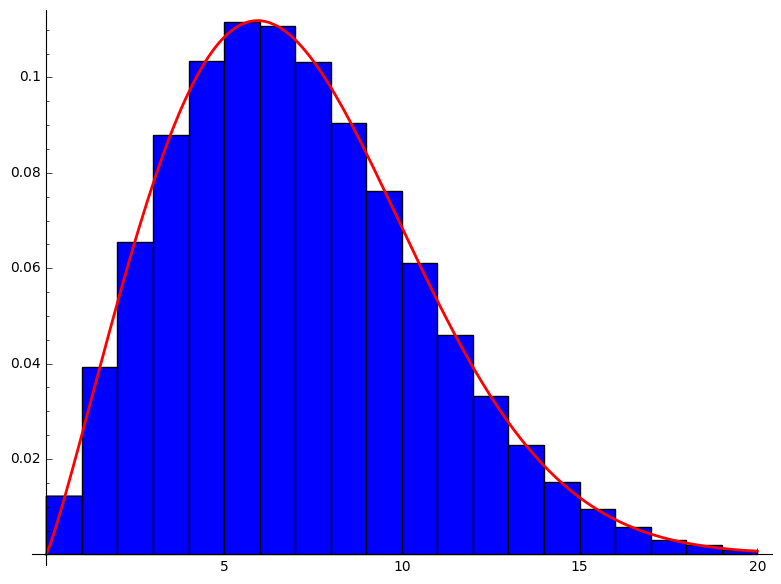

In [10]:
G = Graphics()
T = RealDistribution('weibull', [8, 2.13])
G += T.plot(xmin=0, xmax=20, color='red', thickness=2)
G += histogram([T.get_random_element() for _ in range(365*24*60)],bins=20, normed=True, range=[0,20])
G.show()
#T.generate_histogram_data(num_samples=10000, bins=4)

#### Lösung
Einsetzen in die gegebene Gleichung liefert folgende Ergebnisse.

| Windgeschw., $\si{m/s}$ | $5\pm0.5$ | $10\pm0.5$ | $15\pm0.5$ |
|------|------|------|------|
| $h(v)$                  | 0.108     | 0.0686     | 0.0119     |

HINWEIS: Die vorliegende Weibullverteilung ist erstellt worden, basierend auf ganzzahligen Windgeschwindigkeiten. Dies bedeutet, dass die hier berechneten Wahrscheinlichkeiten den Intervallen $5\pm\SI{0.5}{m/s}$, $10\pm\SI{0.5}{m/s}$ und $15\pm\SI{0.5}{m/s}$ entsprechen. Alternativ ist es ebenfalls möglich andere Intervalle zu definieren und deren Wahrscheinlichkeit zu bestimmen. Siehe dazu Teilaufgabe 3c).

#### b)
Bei bekannten Form- und Skalenparameter kann die mittlere Windgeschwindigkeit durch
\begin{align*}
  \bar v = A \cdot \left( 0.568 + \frac{0.434}{C} \right)^{\frac{1}{C}}
\end{align*}
approximiert werden. Welche mittlere Windgeschwindigkeit kann für den Standort in Helgoland abgeschätzt werden und wie viele Stunden pro Jahr liegen die gemittelte Windgeschwindigkeiten vor?

In [11]:
mittlereGeschwindigkeit = integral_numerical(Geschwindigkeit * WeibullHelgoland, 0, 100)[0]
Wahrscheinlichkeit = WeibullHelgoland(Geschwindigkeit = mittlereGeschwindigkeit)
Stunden = Wahrscheinlichkeit * Jahr / Stunde
Loesung1 =  """Die Auftrtenswahrscheinlichkeit der mittleren Geschwindigkeit ({:.2f} m/s) beträgt {:.1f} %. 
Im Jahr weht der Wind etwa {:d} Stunden mit der mittleren Windgeschwindigkeit.""".format(
    float(mittlereGeschwindigkeit),
    float(Wahrscheinlichkeit * 100),
    int(Stunden)
)
Loesung2 = 'Mit der gegebenen Formel ergibt sich eine mittlere Geschwindigkeit von {:.2f} m/s.'.format(
    float((Skalenparameter * (0.568 + 0.434 / Formparameter)**(1/Formparameter))(Skalenparameter = 8, Formparameter = 2.13))
)
pretty_print(Loesung1)
pretty_print(Loesung2)

'Die Auftrtenswahrscheinlichkeit der mittleren Geschwindigkeit (7.09 m/s) betr\xc3\xa4gt 10.7 %. \nIm Jahr weht der Wind etwa 939 Stunden mit der mittleren Windgeschwindigkeit.'

'Mit der gegebenen Formel ergibt sich eine mittlere Geschwindigkeit von 7.08 m/s.'

In [12]:
assume(Skalenparameter>0)
assume(Formparameter>0)
Formel = Wahrscheinlichkeitsdichte.integrate(Geschwindigkeit,0,1000).expand()
pretty_print(Formel)

-e^(-Skalenparameter^(-Formparameter)*e^(Formparameter*log(1000))) + 1

#### Lösung
Einsetzen liefert $\bar v = \SI{7.08}{m/s}$. Die Wahrscheinlichkeit konkrete Windgeschwindigkeiten für $\SI{7}{m/s}$ liegt bei $h(v=\SI{7}{m/s}) = \SI{10.8}{\%}$.

HINWEIS: Explizite Werte, wie $\bar v = \SI{7.08}{m/s}$ können mithilfe der gegeben Gleichung nicht bewertet werden, sondern nur Intervalle. In diesem Fall liegt die errechnete Windgeschwindigkeit im Bereich von $h(v= 7\pm\SI{0.5}{m/s})$. Daraus lässt sich eine Zeit von $t=0.108\cdot\SI{8760}{h}=\SI{945}{h}$ abschätzen.

#### c)
Die Verteilungsfunktion der Weibullverteilung gibt an, wie wahrscheinlich Windgeschwindigkeiten $v_0 \leq v$ auftreten. Bestimme die Häufigkeit von Windgeschwindigkeiten im Bereich von $5$ bis $\SI{10}{m/s}$, von $10$ bis $\SI{15}{m/s}$ und von $15$ bis $\SI{20}{m/s}$.

In [13]:
H = Verteilungsfunktion(Formparameter = 2.13, Skalenparameter = 8)
Aufgabe3c = list()
for v in (5, 10, 15):
    row = list()
    row.append('{:2d}...{:d}'.format(v,int(v + 5)))
    row.append('{:4.1f}'.format(float((H(Geschwindigkeit = v + 5) - H(Geschwindigkeit = v)) * 100 )))
    Aufgabe3c.append(row)
tab = table(Aufgabe3c, header_row=["Intervall in m/s", "Anteil in %"]).transpose()
pretty_print(tab)

Intervall in m/s,5...10,10...15,15...20
Anteil in %,49.2,17.8,2.1


#### Lösung
Einsetzen und Bilden der Differenzen auf Grundlage der Stammfunktion $H(v+5) - H(v)$ liefert die drei Häufigkeiten

| Windgeschwindigkeiten in $\si{m/s}$ 	| 5..10		| 10..15	| 15..20	|
| ----- | ----- | ------ | ----- |
| $h(v)$                                | $0.492$   	| $0.175$ 	| $0.0212$	|

**HINWEIS**: Falls die Formel von $H(v)$ nicht zur Hand liegt, können die Werte auch durch Aufsummieren der Einzelwerte oder dem Integral im gegebenen Intervall von $h(v)$ approximiert werden.

#### d)
Bestimme den Jahresenergieertrag einer Anlage mit Rotordurchmesser $d = \SI{82}{m}$ und einem Leistungsbeiwert $c_p = {0.5}$ 
bei einer Luftdichte von $\rho = \SI{1.2}{kg/m^3}$ unter der Annahme einer mittleren Windgeschwindigkeit aus Teilaufgabe b).
Berechne für die gleiche Anlage den Jahresenergieertrag unter der Annahme der Häufigkeiten aus Teilaufgabe c). Approximiere dabei die Windgeschwindigkeiten der Intervalle durch deren Mittelwert und gehe davon aus, dass für Windgeschwindigkeiten unter $\SI{5}{m/s}$ und über $\SI{20}{m/s}$ keine Energieentnahme aus dem Wind erfolgen kann. Diskutiere den Unterschied der beiden berechneten Jahresenergieerträge.

In [14]:
Eins = Joule / (kg * Meter**2 / Sekunde**2)
LeistungHelgoland = LeistungWind(
    Dichte = 1.2 * kg / Meter**3,
    RotorRadius = 82 * Meter / 2,
    Leistungsbeiwert = 0.5
) * Eins

EnergieKonstant = LeistungHelgoland(Geschwindigkeit = mittlereGeschwindigkeit * Meter / Sekunde) * Jahr

Ergebnis = 'Bei konstanter mittlerer Windgeschwindigkeit ({:.2f} m/s) ergibt sich eine Energiemenge von {:.3f} GWh.'. format(
    float(mittlereGeschwindigkeit),
    float(EnergieKonstant / GWh)
)
pretty_print(Ergebnis)

'Bei konstanter mittlerer Windgeschwindigkeit (7.09 m/s) ergibt sich eine Energiemenge von 4.936 GWh.'

In [15]:
GesamtEnergie = 0
Aufgabe3d = list()
for v in (5, 10, 15):
    Stunden = (H(Geschwindigkeit = v + 5) - H(Geschwindigkeit = v)) * Jahr
    Energie = LeistungHelgoland(Geschwindigkeit = (v + 2.5) * Meter / Sekunde) * Stunden
    GesamtEnergie += Energie / GWh
    row = list()
    row.append('{:2d}...{:d}'.format(v,int(v + 5)))
    row.append('{:4.1f}'.format(float(v + 2.5)))
    row.append('{:4.1f}'.format(float(Stunden / Stunde)))
    row.append('{:4.1f}'.format(float(Energie / MWh)))
    Aufgabe3d.append(row)
    
pretty_print('Wird die Windgeschwindigkeitsverteilung in drei Intervalle eingeteilt, ergibt sich eine Energie von {:.3f} GWh.'.format(
    float(GesamtEnergie)
))
tab = table(Aufgabe3d, header_row=["Intervall in m/s", "Mittelwert in m/s", "Stunden", "Energieertrag in MWh"]).transpose()
pretty_print(tab)

'Wird die Windgeschwindigkeitsverteilung in drei Intervalle eingeteilt, ergibt sich eine Energie von 9.286 GWh.'

Intervall in m/s,5...10,10...15,15...20
Mittelwert in m/s,7.5,12.5,17.5
Stunden,4312.5,1560.6,185.4
Energieertrag in MWh,2882.4,4829.1,1574.1


In [16]:
vmps = var('vmps')
EnergieVariabel = integral_numerical(
    LeistungHelgoland(
        Geschwindigkeit = vmps * Meter / Sekunde
    ) * WeibullHelgoland(Geschwindigkeit = vmps) * Jahr / GWh,
    5, 
    20
)[0]

Loesung = 'Bei variabler Windgeschwindigkeit ergibt sich eine Energiemenge von {:.3f} GWh.'. format(
    float(EnergieVariabel)
)
pretty_print(Loesung)

'Bei variabler Windgeschwindigkeit ergibt sich eine Energiemenge von 8.553 GWh.'

#### Lösung
Im ersten Fall ist die Geschwindigkeit konstant und es ergibt somit für $\Delta t=\SI{8760}{h}$

\begin{align*}
    E(\bar v) 
        = c_p\cdot \frac{\rho}{2} A \bar{v}^3 \cdot \Delta t
        = 0.5 \cdot \frac{1.2\si{kg/m^3}}{2} \cdot \pi \frac{(\SI{82}{m})^2}{4} \cdot (\SI{7.08}{m/s})^3 \cdot \SI{8760}{h} 
        = \SI{4.925}{GWh}.
\end{align*}

Im zweiten Fall existieren einzelne Windgeschwindigkeiten gemäß ihrer Häufigkeit. Demnach weht $\SI{49.2}{\%}$ des Jahres ein Wind mit einer Windstärke von circa $\SI{7.5}{m/s}$


| Windgeschw., $\si{m/s}$  	| 5..10		| 10..15	| 15..20	|
| ------ | ------ | -------- | -------- |
| $\bar v_i$, $\si{m/s}$					| 7.5		| 12.5		| 17.5		|
| $\Delta t_i$, $\si{h}$     				| 4309.9   	| 1533.0 	| 185.7		|
| $E_i$, $\si{MWh}$						| 2880.7   	| 4743.6	| 1576.9	|

\begin{align*}
    \bar E(v) = \sum_{i=1}^3 c_p \cdot \frac{\rho}{2} A v_i^3 \cdot \Delta t_i = \SI{9.201}{GWh}.
\end{align*}

Erklärung der Abweichung beider Ergebnisse: der nichtlinearer Zusammenhang zwischen Windgeschwindigkeit und entnommener Energie ($E \sim v^3 $) führt zu Fehlern bei Verwendung linear gemittelter Abhängigkeiten.

### 4.
Die Kosten einer Windkraftanlage betragen $\SI{1150}{€}$ pro $\si{kW}$ installierter Leistung (Anlagen im $\si{MW}$ Bereich bei einer Turmhöhe über $\SI{100}{m}$). 
Für Fundament, Netzanbindung und sonstige Kosten fallen weitere $\SI{35}{\%}$ der Anlagenkosten an. 
Die jährlichen Betriebskosten der Anlage liegen bei circa $\SI{3}{\%}$ der gesamten Anlageninvestition. 
Aus gegenwärtiger Sicht liegt die Betriebsdauer der Windkraftanlage bei $20$ Jahren. Es kann Näherungsweise von einem Zinssatz von $\SI{3.5}{\%}$ ausgegangen werden.

In [17]:
# Einheiten
Euro = var('Euro')
ct = Euro / 100

# Kosten
Anlagenkosten = 1150 * Euro / (1000 * Watt)
AnteilInstallation = 0.35
AnteilBetrieb = 0.03 / Jahr

# Investionskosten
InstallierteLeistung = var('InstallierteLeistung')
Investitionskosten = InstallierteLeistung * Anlagenkosten * (1 + AnteilInstallation)

# Annuitäten und Gesamtkosten
Zins = 0.035
Dauer = 20
Zinssatz = var('Zinssatz')
Lebensdauer = var('Lebensdauer')
Annuitaet = Investitionskosten * Zinssatz * (1 + Zinssatz)**Lebensdauer / ((1 + Zinssatz)**Lebensdauer - 1) / Jahr
Gesamtkosten = Annuitaet * Lebensdauer * Jahr

#### a)
Wie hoch liegen die Gesamtinvestitionen eines potentiellen Investors, wenn ein Windpark aus zehn $\SI{5}{MW}$-Anlagen errichtet werden soll.

In [18]:
LeistungPark = 10 * 5 * 1e+6 * Watt
KInv = Investitionskosten(InstallierteLeistung = LeistungPark)
Loesung = 'Die Investitionskosten liegen bei {:.3f} Mio. €'.format(float(KInv / (1e+6*Euro)))
pretty_print(Loesung)

'Die Investitionskosten liegen bei 77.625 Mio. \xe2\x82\xac'

#### Lösung
Es werden die Parkkosten $+ \SI{35}{\%}$ berechnet. 
Wichtig hierbei ist, dass die Betriebskosten nicht zu den Investitionskosten gerechnet werden, da diese von den späteren Einnahmen gedeckt werden. 
Die Investitionskosten betragen:

\begin{align*}
    K_\mathrm{Inv} 
        = 10 \cdot \SI{5000}{kW} \cdot \SI{1150}{€/kW} \cdot 1.35 
        = \SI{77.625}{M€}
\end{align*}

#### b)
Wie hoch sind die daraus resultierenden jährlichen Kosten im Verlauf der Betriebsdauer, wenn die Kostenbetrachtung auf Grundlage der Annuitätenmethode.

In [19]:
a = Annuitaet(InstallierteLeistung = 10 * 5 * 1e+6 * Watt, Zinssatz = Zins, Lebensdauer = Dauer)

Aufgabe4b = list()
row = list()
row.append('{:.3f}'.format(float(a / (1e+6 * Euro / Jahr))))
row.append('{:.3f}'.format(float( (a + KInv * AnteilBetrieb) / (1e+6 * Euro / Jahr))))
Aufgabe4b.append(row)
tab = table(Aufgabe4b, header_row=["Annuitäten in Mio. €/a", "Jährliche Kosten in Mio. €/a"]).transpose()
pretty_print(tab)

Annuitäten in Mio. €/a,5.462
Jährliche Kosten in Mio. €/a,7.791


#### Lösung
Die Investitionskosten liefern eine Annuität von

\begin{align*}
    a = \SI{77.625}{M€} \cdot \frac{0.035 \cdot (1.035)^{20}}{(1.035)^{20} - 1} = a = \SI{5.462}{M€}
\end{align*}

Hierzu werden nun die jährlichen Betriebskosten addiert

\begin{align*}
    K_\mathrm{Jahr} = a + 0.03\cdot K_\mathrm{Inv} = \SI{7.791}{M€}
\end{align*}

um die jährlichen Gesamtkosten in Höhe von $\SI{7.791}{M€}$ zu erhalten.

#### c)
Wie hoch ist der jährlich zu erwartende Energieertrag des Windparks, wenn an dem potentiellen Standort mit $1000$, $1700$ bzw. $2350$ Vollaststunden gerechnet werden kann?

In [20]:
Aufgabe4c = list()
for t in (1000, 1700, 2350):
    row = list()
    row.append('{:d}'.format(t))
    row.append('{:6d}'.format(int(LeistungPark * t * Stunde / MWh)))
    Aufgabe4c.append(row)

table(Aufgabe4c, header_row=["Volllastunden", "Energieertrag in MWh"]).transpose()

Volllastunden,1000,1700,2350
Energieertrag in MWh,50000,85000,117500


#### Lösung
Es gilt die Gleichung $E = P \cdot \Delta t$. Damit ergeben sich für die Einzelnen Vollaststundenwerte

| Vollaststunden in Stunden  | $1000$ | $1700$ | $2350$		|
| --- | --- | --- | ---- |
| Energieertrag in $\si{MWh}$  | $50000$ | $85000$ | $117500$	|

#### d)
Welche Stromgestehungskosten resultieren daraus? Wie hoch ist der dabei der Anteil der Betriebskosten?

In [21]:
Aufgabe4d = list()
for i in range(len(Aufgabe4c)):
    t = Aufgabe4c[i][0]
    #Energieertrag = Aufgabe4c[i][1]
    Energieertrag = Integer(Aufgabe4c[i][1]) * MWh
    Kosten = (a + KInv * AnteilBetrieb) * Jahr
    row = list()
    row.append('{:d}'.format(int(t)))
    row.append('{:4.1f}'.format(float(Kosten / Energieertrag / (Euro / MWh))))
    row.append('{:4.1f}'.format(float(Kosten / Energieertrag / (ct / kWh))))
    row.append('{:4.2f}'.format(float(KInv * AnteilBetrieb * Jahr / Energieertrag / (ct / kWh))))
    Aufgabe4d.append(row)

header_row = ["Volllaststunden",
             "Stromgestehungskosten in Euro/MWh",
             "Stromgestehungskosten in ct/kWh",
             "Anteil der Betriebskosten an Stromgestehungskosten in ct/kWh"]
table(Aufgabe4d, header_row=header_row).transpose()

Volllaststunden,1000,1700,2350
Stromgestehungskosten in Euro/MWh,155.8,91.7,66.3
Stromgestehungskosten in ct/kWh,15.6,9.2,6.6
Anteil der Betriebskosten an Stromgestehungskosten in ct/kWh,4.66,2.74,1.98


#### Lösung
Die Angabe sollte Grundsätzlich in $\si{ct/kWh}$ oder $\si{€/MWh}$ erfolgen. Es muss der Quotient aus jährlichen Betriebskosten und Energieertrag $(K_\mathrm{Jahr}/E)$ gebildet werden. Für die Betrachtung des Anteils der Betriebskosten, wird deren Quotient mit dem Energieertrag $(0.03 \cdot K_\mathrm{Inv}/E)$ betrachtet.

In [22]:
Loesung4d = [ 
    [ 1000, 1700, 2350 ],
    [ 155.8, 91.66, 66.31 ],
    [ 15.6, 9.17, 6.63 ],
    [ 4.66, 2.74, 1.98 ]
    ]
table(Aufgabe4d, header_row=header_row).transpose()

Volllaststunden,1000,1700,2350
Stromgestehungskosten in Euro/MWh,155.8,91.7,66.3
Stromgestehungskosten in ct/kWh,15.6,9.2,6.6
Anteil der Betriebskosten an Stromgestehungskosten in ct/kWh,4.66,2.74,1.98


### Zusatz
Der maximale Leistungsbeiwert einer Windkraftanlage wird nur bei optimaler Schnelllaufzahl $\lambda = \tfrac{u}{v}$ erreicht. Dabei kann die Umlaufgeschwindigkeit $u$ aus Rotordurchmesser $d$ und Rotordrehzahl $n$ mittels $u = \pi \cdot d \cdot n$ berechnet werden. Bestimme für einen Rotor mit $\SI{44}{m}$ Durchmesser, einer Drehzahl von $\SI{28}{{min}^{-1}}$ und einer optimalen Schnelllaufzahl von $\lambda_\mathrm{opt} = 7.5$ die Auslegungsgeschwindigkeit.

In [23]:
Schnelllaufzahl = var('Schnelllaufzahl')
Umlaufgeschwindigkeit = var('Umlaufgeschwindigkeit')
Auslegungsgeschwindigkeit = var('Auslegungsgeschwindigkeit')
RotorDurchmesser = var('RotorDurchmesser')
Drehzahl = var('Drehzahl')

In [24]:
Gleichung1 = Schnelllaufzahl == Umlaufgeschwindigkeit / Auslegungsgeschwindigkeit
Gleichung2 = Umlaufgeschwindigkeit == pi * RotorDurchmesser * Drehzahl

Loesung = solve([Gleichung1, Gleichung2],Auslegungsgeschwindigkeit,Umlaufgeschwindigkeit)[0][0]

Ergebnis = Loesung(
    Drehzahl = 28 / Minute,
    RotorDurchmesser = 44 * Meter,
    Schnelllaufzahl = 7.5
).rhs() / (Meter / Sekunde)

pretty_print('Die Auslegungsgeschwindigkeit beträgt {:.1f} m/s.'.format(float(Ergebnis)))

'Die Auslegungsgeschwindigkeit betr\xc3\xa4gt 8.6 m/s.'

In [25]:
pretty_print(Loesung)

Auslegungsgeschwindigkeit == pi*Drehzahl*RotorDurchmesser/Schnelllaufzahl

#### Lösung
Es wird die Definition für $u$ in die Definition der Schnelllaufzahl eingesetzt und anschließend nach $v$ umgestellt. Daraus ergibt eine Auslegungsgeschwindigkeit von:
\begin{align*}
    v = \frac{\pi d n}{\lambda} = \SI{8.6}{m/s}
\end{align*}

## Formelsammlung
Potenzgesetz von Hellmann zur Bestimmung des Geschwindigkeitsprofils:
\begin{align*}
    v(h) = v_0 \left( \frac{h}{h_0} \right)^\alpha
\end{align*}

Leistungs- und Energiebegriffe:

Leistung:
\begin{align*}
P 			 	
    &= \frac{dE}{dt} = \frac{dE_{kin}}{dt} = \frac{1}{2} \frac{dm}{dt} (u_2^2 - u_1^2)	\\
P_\mathrm{Wind} 
    &= \frac{1}{2} \frac{dm}{dt} u^2 = \frac{\rho}{2} \cdot \Pi r^2 \cdot u^3			\\
P_\mathrm{Anlage} 
    &= c_p \cdot \frac{\rho}{2} \cdot \Pi r^2 \cdot u^3			
\end{align*}

Energie(ertrag):
\begin{align*}
E 
    = \int \diff E 
    = \int P \diff t 
    = c_p \cdot \frac{\rho}{2} A \bar v^3 \int \diff t 
    = c_p \cdot \frac{\rho}{2} A \bar v^3 \Delta t
\end{align*}

Weibullverteilung (h...Dichtefkt., H...Verteilungsfkt.)
\begin{align*}
	h(v) &= \frac{C}{A} \left( \frac{v}{A} \right)^{C-1} \cdot \exp \left( - \left( \frac{v}{A} \right)^C \right) \\
	H(v) &= \int_{0}^{v} h(v) \diff v = 1 - \exp\left(-\left(\frac{v}{A}\right)^C \right)
\end{align*}

Mittelwert:
\begin{align*}
	  \bar v 	= \frac{1}{\int_a^b\diff t} \cdot \int_a^b v(t) \cdot \diff t = \frac{1}{t_\text{tot}} \cdot \int_a^b v(t) \cdot \diff t
\end{align*}

Annuitätenmethode:
\begin{align*}
a = K_\mathrm{Inv} \frac{i \cdot (1+i)^n}{(1+i)^n - 1},
\end{align*}

|	$a$ 			   | Annuität				|
| -------------------- | --------------------   |   
|	$K_\mathrm{Inv}$ 	| Gesamtinvestition 	|
|	$i$ 				| Kalkulationszins 		|
|   $n$ 				| Laufzeit              |

# ENDE


Viel Spaß beim Üben!